# **Evaluation of a strategy built from Multiple Linear Regression Model**

In [ ]:
# Set up the environment

import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

1. Model set up

In [ ]:
indicepanel = pd.read_csv('/content/drive/MyDrive/indicepanel.csv')
indicepanel.head()

,Date,spy,spy_lag1,nasdaq,cac40,daxi,hsi,nikkei,Price
0,2019-08-26,2.270020,-3.650024,-114.069824,-103.250000,-185.820313,358.330078,-64.400390,287.269989
1,2019-08-27,-3.399994,2.270020,79.199707,39.689942,18.849610,-51.910156,-11.140625,289.540009
2,2019-08-28,5.579986,-3.399994,-110.429687,22.229980,66.160156,-151.599609,5.109375,286.140015
3,2019-08-29,2.500000,5.579986,147.429687,-13.080078,-17.830078,97.169922,-39.570312,291.720001
4,2019-08-30,-3.649994,2.500000,69.380371,92.600098,163.459961,-286.910156,62.878907,294.220001


In [ ]:
Train = indicepanel.iloc[-1000:-500, :]
Test = indicepanel.iloc[-500:, :]
formula ='spy~spy_lag1+nasdaq+cac40+daxi+nikkei+hsi'
lm=smf.ols(formula=formula, data=Train).fit()
Train['PredictedY']= lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

2. Profit of signal-based strategy

In [ ]:
# Profit calculation in Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit']= Train['spy']*Train['Order']
Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train is:', Train['Profit'].sum(), ' $')

Total profit made in Train is: 258.1299880000002  $


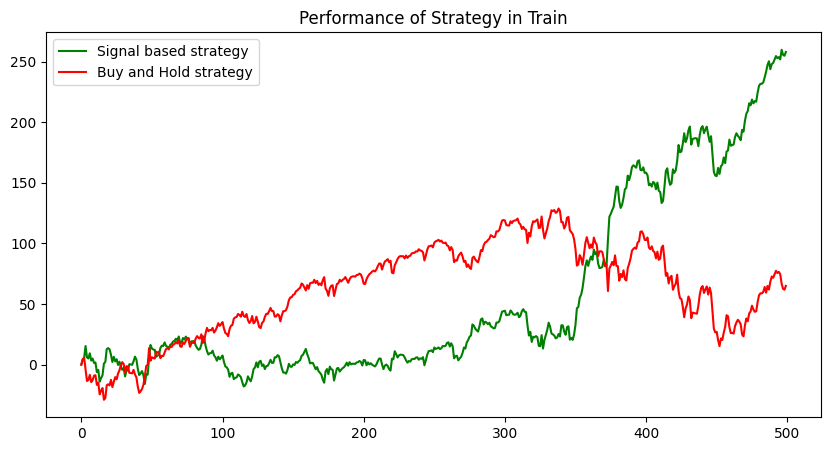

In [ ]:
#Graphical representation of Train profits
plt.figure(figsize=(10,5))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color = 'green', label = 'Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color = 'red', label = 'Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
# Profit calculation in Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit']= Test['spy']*Test['Order']
Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test is:', Test['Profit'].sum(), ' $')

Total profit made in Test is: 87.93054000000012  $


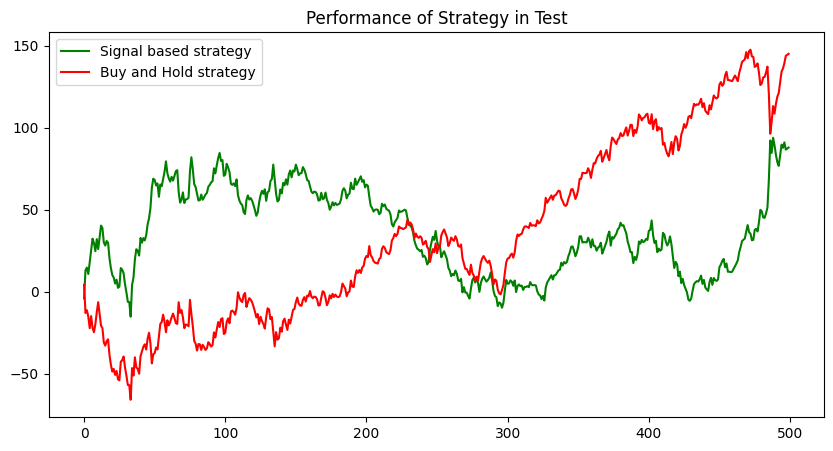

In [ ]:
#Graphical representation of Test profits
plt.figure(figsize=(10,5))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color = 'green', label = 'Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color = 'red', label = 'Buy and Hold strategy')
plt.legend()
plt.show()

3. Model evaluation based on Pratical Standard

3.1 Sharpe Ratio

In [ ]:
Train['Wealth']= Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth']= Test['Wealth'] + Test.loc[Test.index[0], 'Price']

#Sharpe Ration on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()
print ('Daily Sharpe Ration is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ration is  0.11052583096602038
Yearly Sharpe Ratio is  1.7545431731091108


In [ ]:
#Sharpe Ration on Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()
print ('Daily Sharpe Ration is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ration is  0.041685739021038754
Yearly Sharpe Ratio is  0.6617405920056579


3.2 Maximum Drawdown

In [ ]:
#Maximum Dradown in Train
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Test is ', Train['Drawdown'].max())

#Maximum Dradown in Test
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.016801664608369595
Maximum Drawdown in Test is  0.18900493834650153
